# Evaluation Project 2 - Avocado Project

**Problem Statement**

**Avocado is a fruit consumed by people heavily in the United States.**

**Content**

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

**Date** - The date of the observation

**AveragePrice** - the average price of a single avocado

**type** - conventional or organic

**year** - the year

**Region** - the city or region of the observation

**Total Volume** - Total number of avocados sold

**4046** - Total number of avocados with PLU 4046 sold

**4225** - Total number of avocados with PLU 4225 sold

**4770** - Total number of avocados with PLU 4770 sold



**Inspiration /Label**

**The dataset can be seen in two angles to find the region and find the average price.**

**Task:** One of Classification and other of Regression


To download the dataset, use the link given below. 

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.shape

(18249, 14)

**Dataset** has **18249 rows** and **14 columns**.

In [5]:
df.columns    # Printing names of all the columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

The Feature **"Unnamed:0"** is just a representation of the indexes, so it's useless to keep it, lets **remove** it now

In [4]:
# Dropping the irrelevant column Unnamed: 0

df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [8]:
df['region'].nunique()

54

**region** has **high cardinality**, it has **54 distinct values**

In [9]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

**type'** has two categories and is **balanced**

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing values in the given dataset and hence good to go ahead

In [12]:
df.duplicated().sum()

0

**No duplicates present in the given dataset**

In [13]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**Date has object datatype which needs to change,as date generally has datetime datatype**

In [5]:
# Converting datatype from object to datetime

df['Date']=pd.to_datetime(df.Date)

In [6]:
# Splitting date into day,month and year is already present as one of the columns

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month


In [7]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Day  Month  
0  Albany   27     12  
1  Albany   20     12  
2  Albany   13     12  
3  Albany    6     12  
4  Albany   29     11

# EDA

In [10]:
# Importing required libraries

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py

Counter({'conventional': 9126, 'organic': 9123})

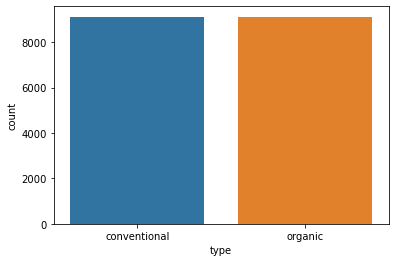

In [18]:
sns.countplot(df['type'])
Counter(df['type'])

**Almost equal number of Organic and Conventional Avacado present in the given dataset**

Counter({'Albany': 338,
         'Atlanta': 338,
         'BaltimoreWashington': 338,
         'Boise': 338,
         'Boston': 338,
         'BuffaloRochester': 338,
         'California': 338,
         'Charlotte': 338,
         'Chicago': 338,
         'CincinnatiDayton': 338,
         'Columbus': 338,
         'DallasFtWorth': 338,
         'Denver': 338,
         'Detroit': 338,
         'GrandRapids': 338,
         'GreatLakes': 338,
         'HarrisburgScranton': 338,
         'HartfordSpringfield': 338,
         'Houston': 338,
         'Indianapolis': 338,
         'Jacksonville': 338,
         'LasVegas': 338,
         'LosAngeles': 338,
         'Louisville': 338,
         'MiamiFtLauderdale': 338,
         'Midsouth': 338,
         'Nashville': 338,
         'NewOrleansMobile': 338,
         'NewYork': 338,
         'Northeast': 338,
         'NorthernNewEngland': 338,
         'Orlando': 338,
         'Philadelphia': 338,
         'PhoenixTucson': 338,
         'Pittsburgh

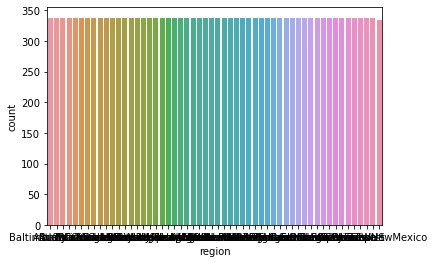

In [19]:
sns.countplot(df['region'])
Counter(df['region'])

**Almost equal number of Avacado's data is available from 54 different region from USA**

In [20]:
df_cont = ['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']

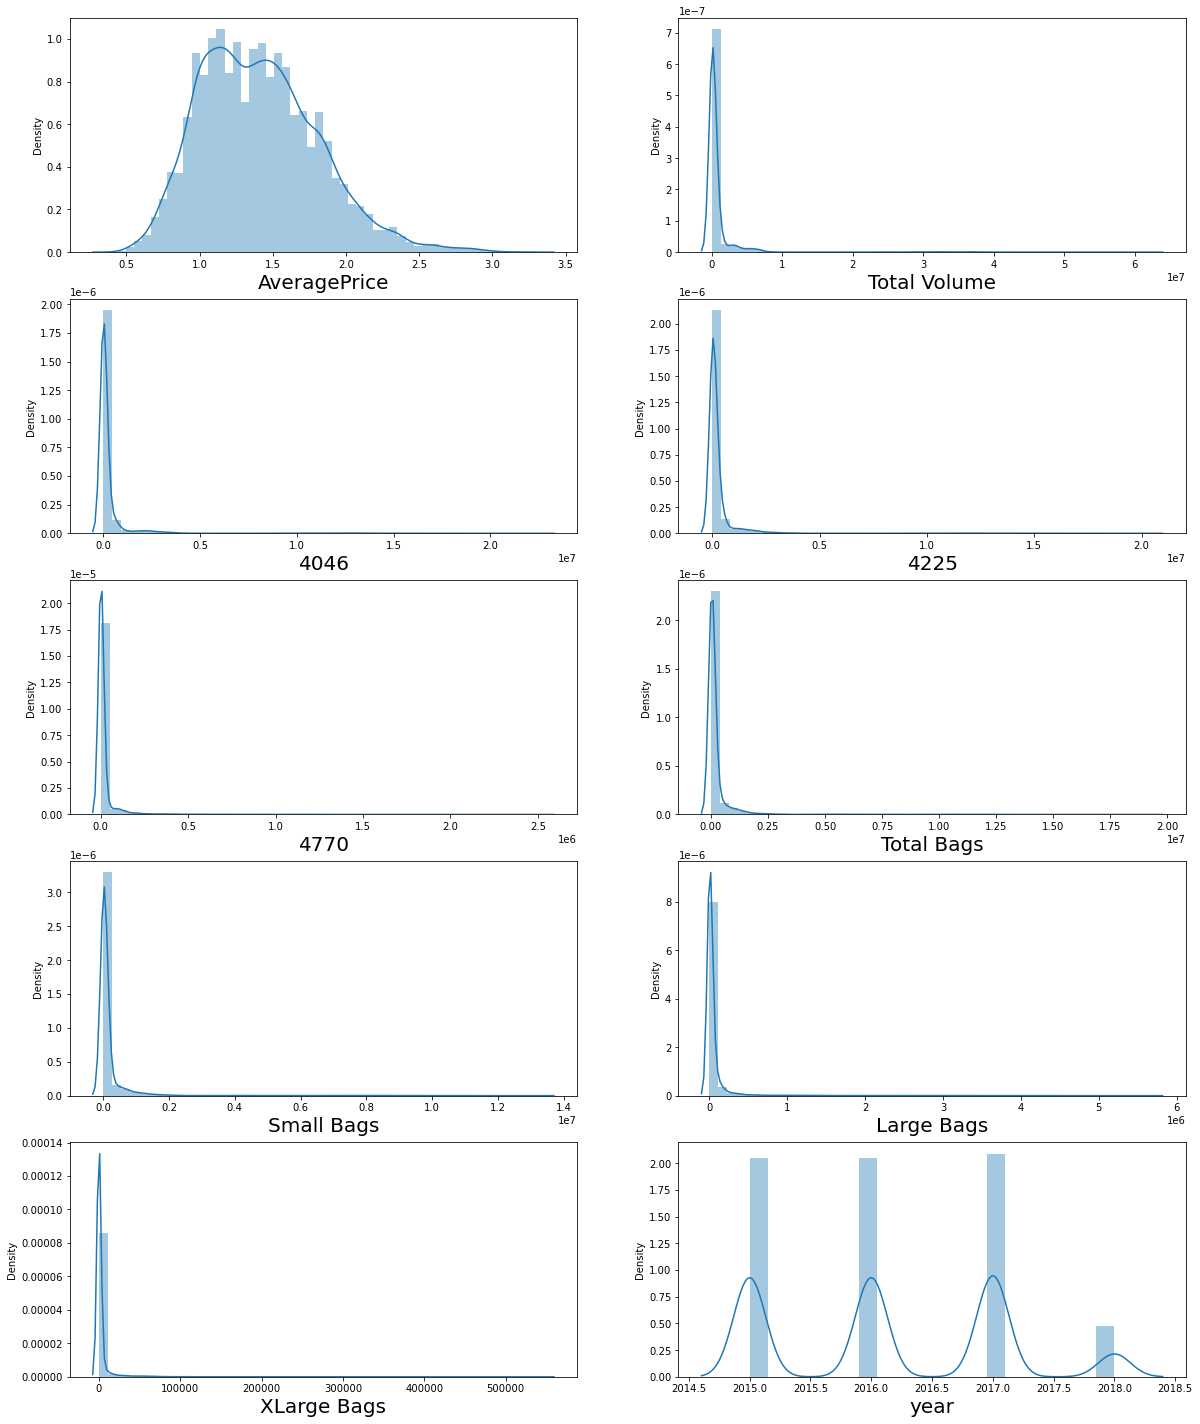

In [21]:
# Lets see how data is distributed for each column. Machine learnong model is built on the assumption that data is
#distributed normally.

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_cont:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

* **Most of the features are positively skewed or right skewed**

* **Large skewness and sharp peak confirms the Outliers presence**

* **'AveragePrice' seems to be normally distributed with a little positive skewness**

Lets check the skewness present in the dataset

In [22]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Day              0.014310
Month            0.106617
dtype: float64

**We can see clearly very high skewness in the dataset and needs to reduce skewness by using transformation techniques**

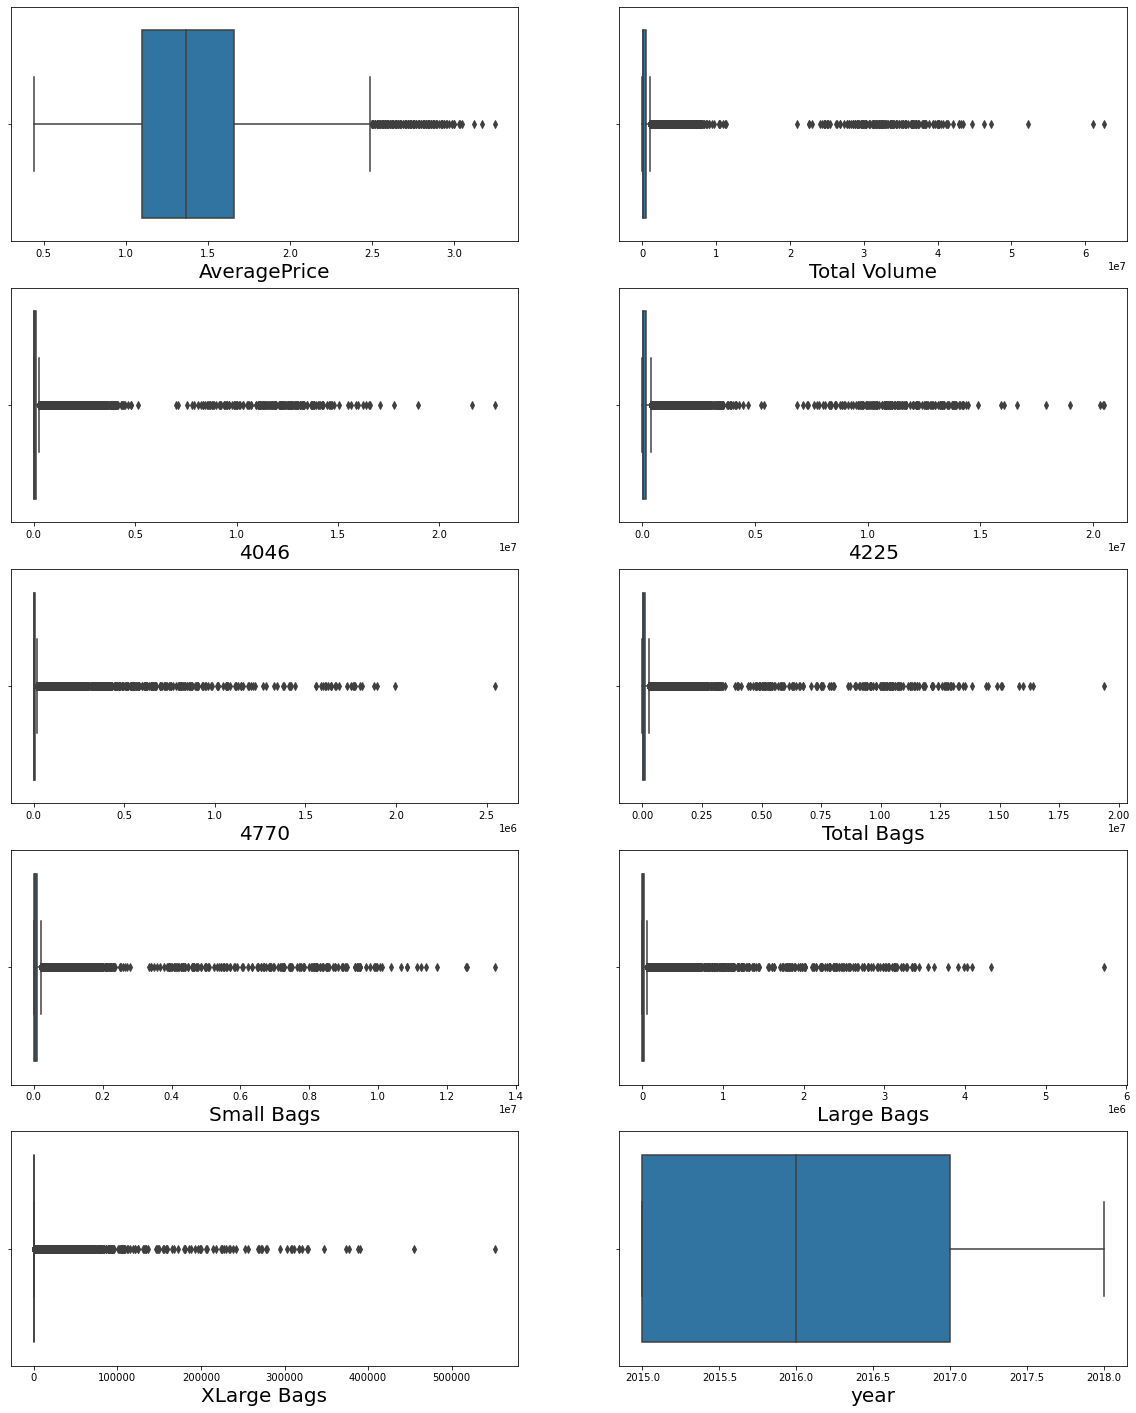

In [23]:
# Lets see the outliers present in the data using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df_cont:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Needs to manage these outliers using some transformation techniques or using zscore value**

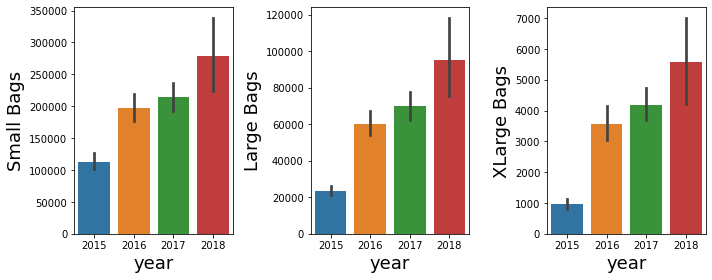

In [24]:
plt.figure(figsize=(10,4),facecolor='white')
plotnumber=1
bag_size = df[['Small Bags','Large Bags','XLarge Bags']]
yr = df['year']
for col in bag_size:
    if plotnumber<=3:
        plt.subplot(1,3,plotnumber)
        sns.barplot(yr,bag_size[col])
        plt.xlabel('year',fontsize=18)
        plt.ylabel(col,fontsize=18)
    plotnumber+=1
plt.tight_layout()

* **Sale of small bags avacado is more as compare to large and XL bags compared over the years**

* **The sale of all bags increased over the years from 2015 to 2018**

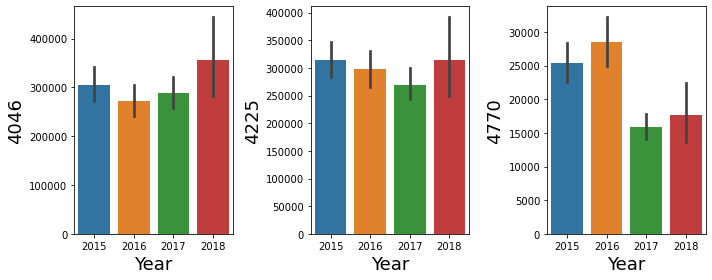

In [25]:
plt.figure(figsize=(10,4),facecolor='white')
plotnumber=1
grade = df[['4046','4225','4770']]
yr = df['year']
for col in grade:
    if plotnumber<=3:
        plt.subplot(1,3,plotnumber)
        sns.barplot(yr,grade[col])
        plt.xlabel('Year',fontsize=18)
        plt.ylabel(col,fontsize=18)
    plotnumber+=1
plt.tight_layout()

* **Sale of 4046 grade Avacado increased gradually over the years**

* **4770 grade of Avacado were least sold when compared to other two grades over the years**

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

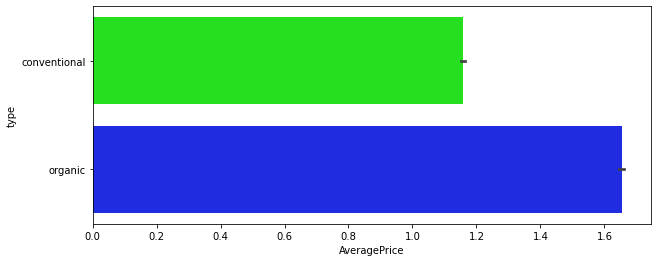

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

**The average price of Organic avacado is higher than conventional type of avacado means Organic avacado are costlier than conventional**

**As expected, this is due to the higher costs of growing and harvesting organic produce**

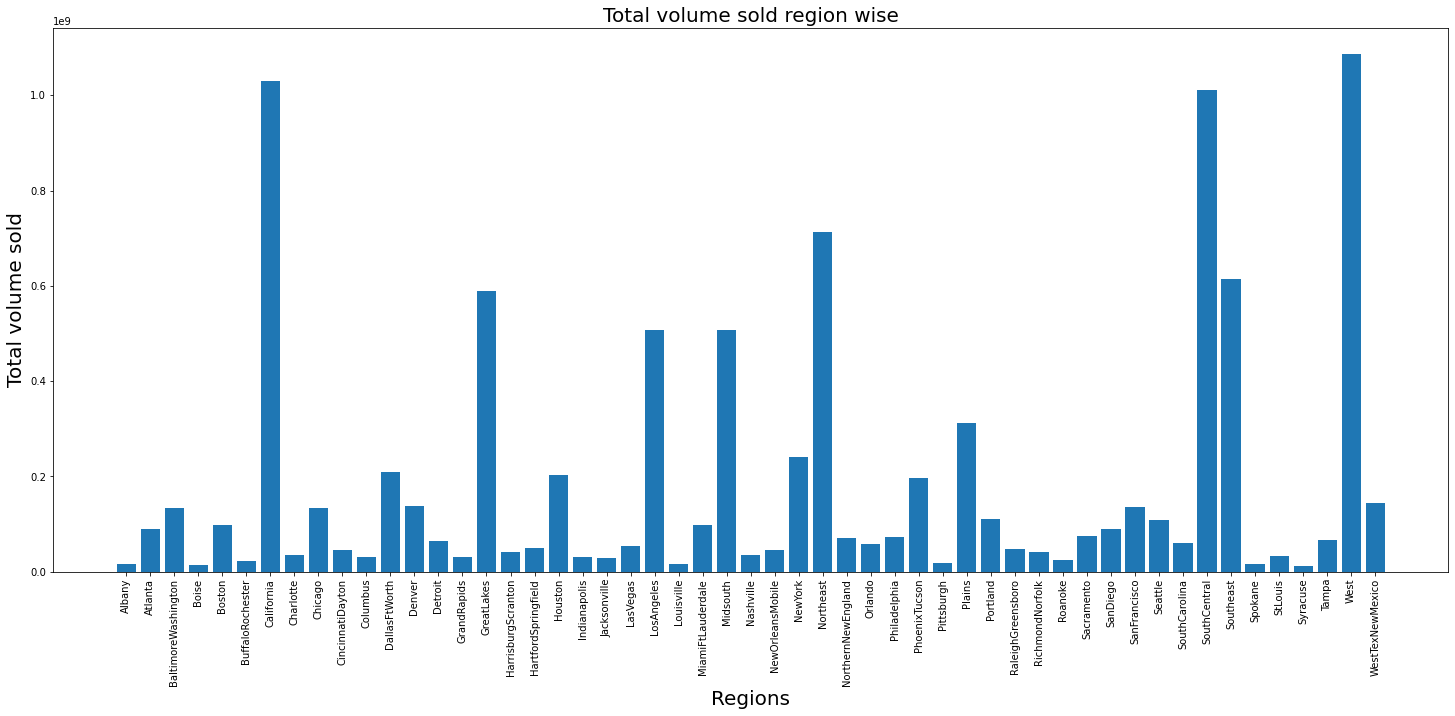

In [27]:
region_sales = df.groupby('region')['Total Volume'].sum().drop(['TotalUS'])
regions_total = df['region'].unique()
#removing TotalUS entry
regions_total = np.delete(regions_total,-3)

plt.figure(figsize = (25,10))
plt.bar(regions_total,region_sales)
plt.xticks(rotation= 90)
plt.xlabel('Regions',fontsize=20)
plt.ylabel('Total volume sold',fontsize=20)
plt.title('Total volume sold region wise',fontsize=20)
plt.show()

**Regions where Avacado Sale is very high**

* West
* California
* SouthCentral
* Northeast
* Southeast

Text(0.5, 1.0, 'Average Price fluctuation over years')

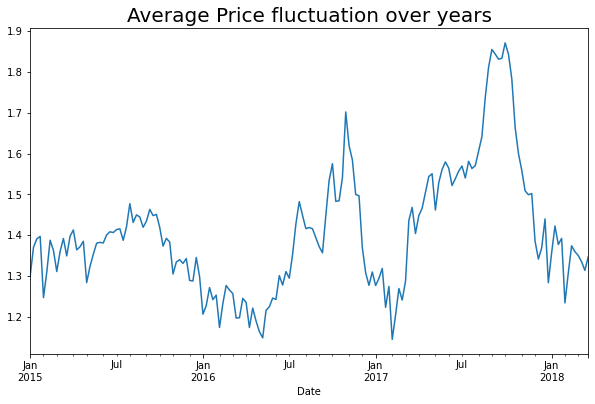

In [28]:
plt.figure(figsize=(10,6))
df.groupby('Date').mean()['AveragePrice'].plot()
plt.title('Average Price fluctuation over years',fontsize=20)

**Price fluctuation of Avacado over the years shows that average price were much higher between July'2017 and Jan'2018 and then it drops down**

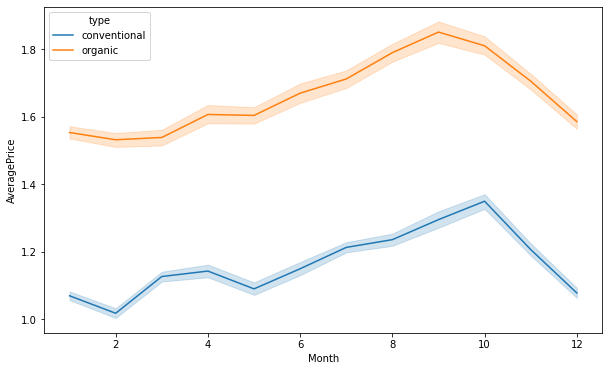

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

**We can see very clearly that the prices of both organic and Convetional avacado were higher between 9th and 10th month of a year means price of avacado generally increases during Fall months in USA**

In [9]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]

labels=['conventional','organic']


trace=go.Pie(labels=labels,values=values)

py.iplot([trace])

* **Conventional Avacado were more consumed than organic avacado**

* **We can say that due to less availability and high cost, organic avacado sale was very very less as compared to conventional avacado**

<AxesSubplot:>

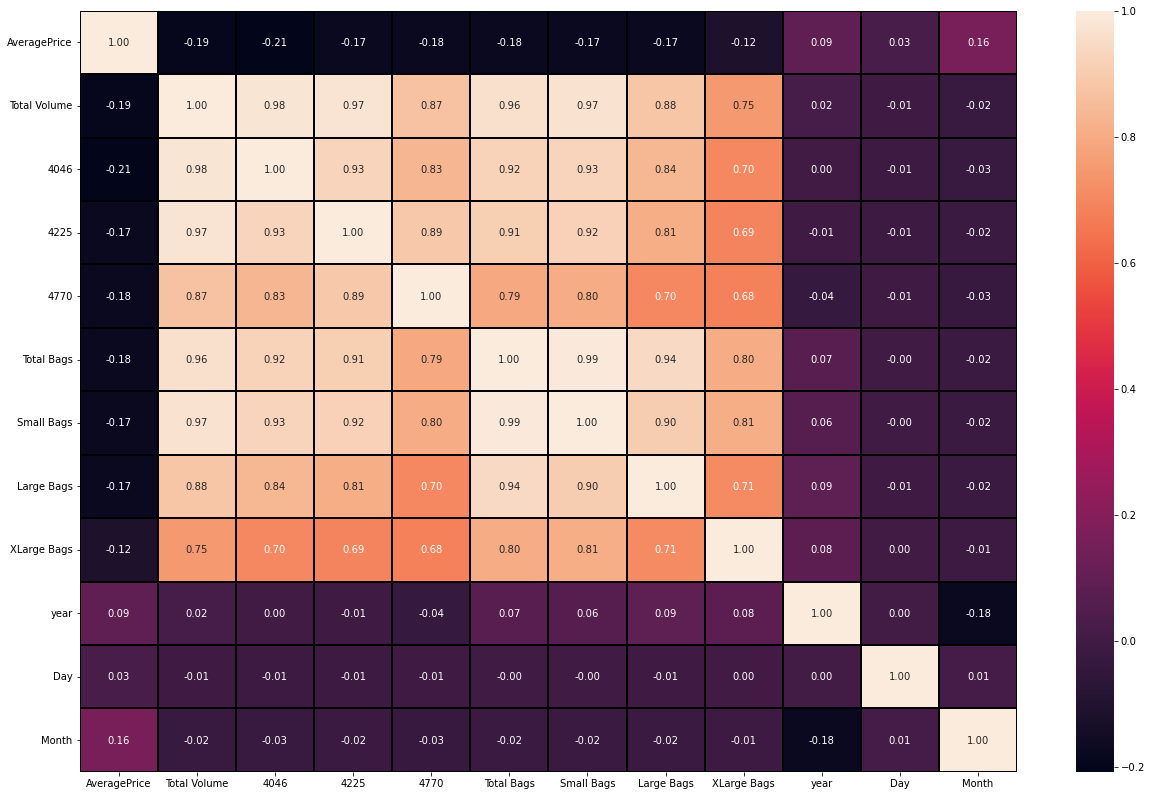

In [31]:
# Plotting heatmap and checking correlation

plt.figure(figsize=(21,14))
sns.heatmap(df.corr(),annot =True,linewidths=0.15,linecolor='black',fmt="0.2f")

* **4046,4225,4770 shows high correlation with Total Volume as these are the particular grade of avacado and total volume includes summation of all these grades and hence moving further we can drop columns (4046,4225,4770)**


* **We observe same case with Small bags,large bags and XL bags with Total Bags and hence moving further we can drop columns (small bags, large bags and XLarge bags)**



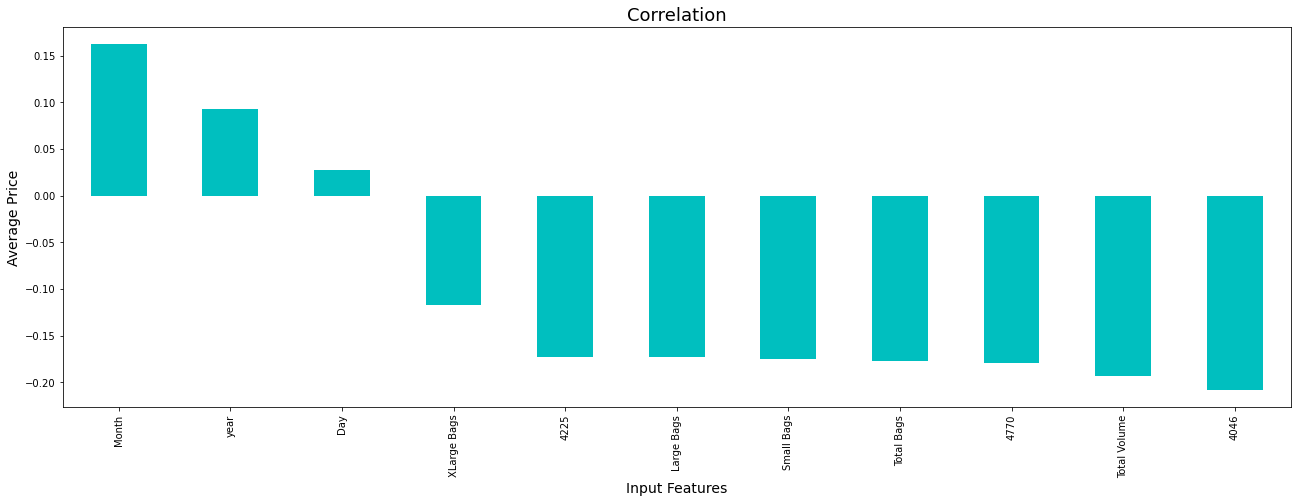

In [32]:
# Checking the features correlation with the target variable

plt.figure(figsize = (22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind ='bar',color='c')
plt.xlabel('Input Features',fontsize = 14)
plt.ylabel('Average Price', fontsize =14)
plt.title('Correlation',fontsize=18)
plt.show()

* **year column is coming two times and we need to drop one year column as well**

* **region column needs to drop as well as it is not an important attribue for predicting average price of avacado**

# Encoding categorical column

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [9]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  Day  \
0     8696.87     8603.62       93.25          0.0     0  2015       0   27   
1     9505.56     9408.07       97.49          0.0     0  2015       0   20   
2     8145.35     8042.21      103.14          0.0     0  2015       0   13   
3     5811.16     5677.40      133.76          0.0     0  2015       0    6   
4     6183.95     5986.26      197.69          0.0     0  2015       0   29   

   Month  
0     12  
1     12  
2     12  
3     12  
4     11

In [12]:
# Dropping date column as it has taken into day, month and year columns

df = df.drop('Date',axis=1)

In [23]:
df1 = df.drop(columns=['type','region','year'],axis=1)  #removing categorical columns for outlier detection in continuous data

# Outlier Detection and Removal

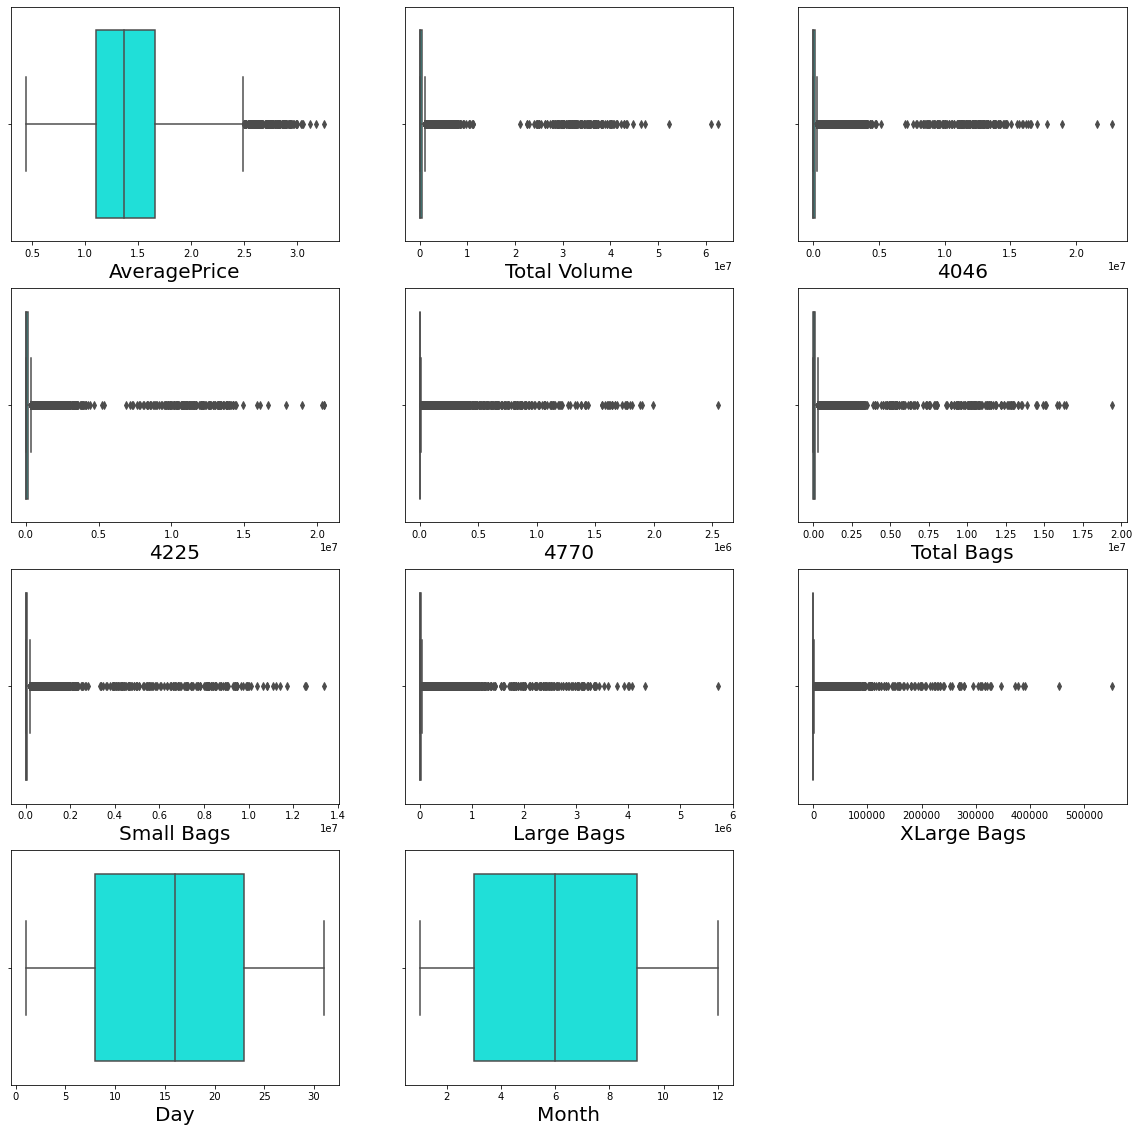

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df1[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
df.shape

(18249, 14)

In [13]:
# Removing outliers using zscore and keeping threshold as 3 (3 std from mean : 99.7% of data included)

from scipy.stats import zscore

z_score = np.abs(zscore(df))

filtering_entry = (z_score < 3).all(axis = 1)

df3 = df[filtering_entry]

In [14]:
# Shape of the dataset after removing outliers

df3.shape

(17651, 14)

In [42]:
print("Data loss in % : ",(18249-17651)/18249*100)

Data loss in % :  3.276891884486821


# Checking Multicollinearity using variance inflation factor

In [26]:
# Dropping columns which we observe during heatmap plot

df4 = df3.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags','region'],axis=1)

In [27]:
# Checking multicollinearity in the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features'] = df4.columns

vif

vif      Features
0  24.094381  AveragePrice
1   7.479633  Total Volume
2   7.222339    Total Bags
3   3.612796          type
4  22.355048          year
5   4.202025           Day
6   4.209407         Month

**Strategy to Address Multicollinearity :**

1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data.

**We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.**


**We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.**

**Also Day has very less correlated with target variable i.e 3% and 1% with other input features**

In [28]:
df5 = df4.drop(['year','Day'],axis=1)

In [29]:
df5.skew()

AveragePrice    0.377432
Total Volume    3.767138
Total Bags      4.066771
type           -0.037741
Month           0.107408
dtype: float64

In [30]:
# Separating features and target variable

X1 = df5.drop(columns=['AveragePrice'], axis=1)
Y1 = df5['AveragePrice']

In [48]:
X1

Total Volume  Total Bags  type  Month
0          64236.62     8696.87     0     12
1          54876.98     9505.56     0     12
2         118220.22     8145.35     0     12
3          78992.15     5811.16     0     12
4          51039.60     6183.95     0     11
...             ...         ...   ...    ...
18244      17074.83    13498.67     1      2
18245      13888.04     9264.84     1      1
18246      13766.76     9394.11     1      1
18247      16205.22    10969.54     1      1
18248      17489.58    12014.15     1      1

[17651 rows x 4 columns]

# Considering skewness reduction using Power Transformer

In [31]:
# Considering skewness reduction through PowerTransformer

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [32]:
X1_new_pt = pt.fit_transform(X1)

In [33]:
# Converting numpy array(X_new_pt) into Dataframe and reassigning the values

X1 = pd.DataFrame(X1_new_pt,columns= X1.columns)

In [34]:
# Checking Skewness

X1.skew().sort_values(ascending=False)

Total Volume   -0.008642
Total Bags     -0.022204
type           -0.037741
Month          -0.146554
dtype: float64

**Skewness ranges from -0.14 to -.008 in the given dataset after Power transformation**

# Feature selection using variance threshold

In [35]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)

**We are going to drop the columns which have less variance than 0.1**

In [36]:
X = df.drop('AveragePrice',axis=1)
y = df['AveragePrice']

In [37]:
X = vt.fit_transform(X)

In [38]:
X.shape

(18249, 13)

**This means all the features are important for consideraion and we cannot drop any column as far as variance threshold for feature selection is considered**

# Scaling using StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [40]:
X_scaler = scaler.fit_transform(X)

# Model Building

# 1. Regression Problem - To predict Average Price of Avacado

In [23]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import pickle
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Finding Best Random State

In [61]:
maxR2score = 0 # Max R2 score
maxRS = 0   # Best random state for which maximum r2 score is achieved

for i in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=i)
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train,y_train)
    
    pred_rf = rf.predict(X_test)
   
    score_rf = r2_score(y_test,pred_rf)
    
    if score_rf>maxR2score:
   
        maxR2score = score_rf
              
        maxRS = i

In [62]:
print("Maximum R2 Score:",maxR2score,"at random state ", maxRS)

Maximum R2 Score: 0.898986351354411 at random state  6


**We find best random state as 6 with max R2 score as 89.89%**

# Train Test Split using best random state

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=6)

# Linear Regression

In [64]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)

pred_test = lr.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=================LINEAR REGRESSION====================")

print("R2 Score:",score_test*100)

cv_score = cross_val_score(lr,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print("CV score :",cv_mean)

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

=================LINEAR REGRESSION====================
R2 Score: 44.346679817754755
CV score : -10.886791675466922
Root mean squared Error: 0.29970237051487564


# Lasso Regularization

In [65]:
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)

lasscv.fit(X_train,y_train)

#Best alpha parameter
alpha = lasscv.alpha_

lasso_reg =Lasso(alpha)

lasso_reg.fit(X_train,y_train)

Lasso(alpha=2.7045242645927643e-06)

In [66]:
pred_test = lasso_reg.predict(X_test)

# All performance parameters for Lasso Regularization

print("=====LASSO REGULARIZATION=====\n")

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

cv_score = cross_val_score(lasso_reg,X_scaler,y,cv=5)

cv_mean = np.mean(cv_score)

print('\nCV Score:',cv_mean)

print('\nR2 Score: ',lasso_reg.score(X_test,y_test)*100)

=====LASSO REGULARIZATION=====

Root mean squared Error: 0.2997794683760173

CV Score: 0.0643469790136261

R2 Score:  44.31804271463159


# Ridge Regularization

In [67]:
ridgecv = RidgeCV(alphas= np.arange(.001,0.1,.01),normalize = True)

ridgecv.fit(X_train,y_train)

alpha = ridgecv.alpha_

ridge_reg = Ridge(alpha)

ridge_reg.fit(X_train,y_train)

pred_test = ridge_reg.predict(X_test)

print("=====RIDGE REGULARIZATION=====\n")

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error:",rmse)

cv_score = cross_val_score(ridge_reg,X_scaler,y,cv=5)

cv_mean = np.mean(cv_score)

print('\nCV Score:',cv_mean)

print('\nR2 Score: ',ridge_reg.score(X_test,y_test)*100)

=====RIDGE REGULARIZATION=====

Root mean squared Error: 0.2997795664175702

CV Score: 0.06434834992363545

R2 Score:  44.318006293548564


**The Linear Regression model does not fit for the given dataset as we can see from the R2 score, root mean square error value**

**Need to check for some other models**

# KNeighbors Regressor

In [68]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====K Neighbors Regressor=====")


pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for K Neighbors Regressor: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor:",rmse)

=====K Neighbors Regressor=====
R square score for test dataset for K Neighbors Regressor:  0.5247650388137743
Cross val score for K Neighbors Regresor: -4.59419555154984
Root mean squared Error for K Neighbors Regressor: 0.2769483805322791


# Hyperparameter Tuning - KNN

In [69]:
# Hyperparameter tuning for K Neighbors Regressor

params_knn = {'n_neighbors':[4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'n_jobs':[-1,1]
             }

grd_knn = GridSearchCV(knn,params_knn)

grd_knn.fit(X_train,y_train)

print(grd_knn.best_params_)

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}


In [70]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_train = knn.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for K Neighbors regressor after tuning: ", acc_train)

pred_test = knn.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for K Neighbors Regressor after tuning: ", acc_test)

knn_score = cross_val_score(knn,X_scaler,y,cv=5)

knn_m = knn_score.mean()

print("Cross val score for K Neighbors Regresor after tuning:",knn_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for K Neighbors Regressor after tuning:",rmse)

R square score for training dataset for K Neighbors regressor after tuning:  0.6549596096080463
R square score for test dataset for K Neighbors Regressor after tuning:  0.5548706687878928
Cross val score for K Neighbors Regresor after tuning: 0.7067527245234029
Root mean squared Error for K Neighbors Regressor after tuning: 0.2680326776106288


# Support Vector Regressor

In [71]:
svr = SVR()

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====Support Vector Regressor=====")


pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for Support Vector Regressor: ", acc_test)

svr_score = cross_val_score(svr,X_scaler,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for Support Vector Regresor:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Support Vector Regressor:",rmse)

=====Support Vector Regressor=====
R square score for test dataset for Support Vector Regressor:  0.5839799405004507
Cross val score for Support Vector Regresor: 6.612065869391751
Root mean squared Error for Support Vector Regressor: 0.259120500926951


# Hyperparameter Tuning - SVR

In [72]:
# Hyperparameter tuning for Support Vector Regressor

params_svr = {'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto'],
              'epsilon':[0.1,0.01]
             }

grd_svr = GridSearchCV(svr,params_svr)

grd_svr.fit(X_train,y_train)

print(grd_svr.best_params_)

{'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [73]:
svr = grd_svr.best_estimator_

svr.fit(X_train,y_train)

pred_train = svr.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for SVR after tuning: ", acc_train)

pred_test = svr.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for SVR after tuning: ", acc_test)

svr_score = cross_val_score(svr,X_scaler,y,cv=5)

svr_m = svr_score.mean()

print("Cross val score for SVR after tuning:",svr_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for SVR after tuning:",rmse)

R square score for training dataset for SVR after tuning:  0.5967171127231219
R square score for test dataset for SVR after tuning:  0.5840565135591291
Cross val score for SVR after tuning: 6.114071377306254
Root mean squared Error for SVR after tuning: 0.2590966528432209


# Ada Boost Regressor

In [74]:
ada = AdaBoostRegressor()

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("=====Ada Boost Regressor=====")


pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)     # Testing accuracy

print("R square score for test dataset for Ada Boost Regressor: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresor:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Ada Boost Regressor:",rmse)

=====Ada Boost Regressor=====
R square score for test dataset for Ada Boost Regressor:  0.5703340136123513
Cross val score for Ada Boost Regresor: -4.130952063667189
Root mean squared Error for Ada Boost Regressor: 0.26333593434950026


# Hyperparameter Tuning - Ada Boost Regressor

In [75]:
params_ada = {'n_estimators': [48,49,51,53,60],
              'learning_rate':[0.90,0.85,0.30,0.95,1.0],
              'loss' :['linear', 'square', 'exponential']
             }

grd_ada = GridSearchCV(ada,params_ada)

grd_ada.fit(X_train,y_train)

print(grd_ada.best_params_)

{'learning_rate': 0.9, 'loss': 'square', 'n_estimators': 60}


In [76]:
ada = grd_ada.best_estimator_

ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)       # Predicting training data with the model

acc_train = metrics.r2_score(y_train,pred_train)    # Training accuracy

print("R square score for training dataset for Ada Boost regressor after tuning: ", acc_train)

pred_test = ada.predict(X_test)       # Predicting test data with the model

acc_test = metrics.r2_score(y_test,pred_test)

print("R square score for test dataset for Ada Boost Regressor after tuning: ", acc_test)

ada_score = cross_val_score(ada,X_scaler,y,cv=5)

ada_m = ada_score.mean()

print("Cross val score for Ada Boost Regresora after tuning:",ada_m*100)


mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for ada boost Regressor after tuning:",rmse)

R square score for training dataset for Ada Boost regressor after tuning:  0.5875284575466039
R square score for test dataset for Ada Boost Regressor after tuning:  0.5876419795430147
Cross val score for Ada Boost Regresora after tuning: 0.3836976622807531
Root mean squared Error for ada boost Regressor after tuning: 0.25797751897499716


# Random Forest Regressor

In [77]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_train = rf.predict(X_train)

pred_test = rf.predict(X_test)

score_train = rf.score(X_train,y_train)

score_test = rf.score(X_test,y_test)

print("=====RANDOM FOREST REGRESSOR=====")

print("Training accuracy for Random Forest model:",score_train*100)

print("Testing accuracy for Random Forest model:",score_test*100)

cv_score = cross_val_score(rf,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model:",rmse)


=====RANDOM FOREST REGRESSOR=====
Training accuracy for Random Forest model: 98.45683172710076
Testing accuracy for Random Forest model: 89.88193801127943
At cross fold 5, the cv score is 21.540233607388572 
Root mean squared Error for Random Forest model: 0.1277889514378651


# Hyperparameter tuning - Random Forest

In [78]:
# For Random Forest Regressor

params_rf = {'criterion':["squared_error", "absolute_error", "poisson"],
             'min_samples_split':(2,3,4,5),
             'max_features':['auto','log2'],
             'max_samples':(0.1,0.2,0.25)}

grd_rf = GridSearchCV(rf,params_rf)

grd_rf.fit(X_train,y_train)

print(grd_rf.best_params_)

{'criterion': 'poisson', 'max_features': 'auto', 'max_samples': 0.25, 'min_samples_split': 2}


In [79]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

rf.score(X_train,y_train)

pred_test = rf.predict(X_test)

rfs = r2_score(y_test,pred_test)

print("=====After tuning parameters of Random Forest=====")

print("R2 score for Random Forest Model after tuning:",rfs*100)

rf_score = cross_val_score(rf,X_scaler,y,cv=5)

rfc = rf_score.mean()

print("Cross val score for Random Forest model after tuning:",rfc*100)

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for Random Forest model after tuning:",rmse)

=====After tuning parameters of Random Forest=====
R2 score for Random Forest Model after tuning: 85.14582824252629
Cross val score for Random Forest model after tuning: 26.44489259307609
Root mean squared Error for Random Forest model after tuning: 0.15483490049390963


# XGradient Boosting Regressor

In [42]:
from xgboost import XGBRegressor

In [45]:
xgb = XGBRegressor()

xgb.fit(X_train,y_train)

xgb.score(X_train,y_train)

pred_train = xgb.predict(X_train)

pred_test = xgb.predict(X_test)

score_train = r2_score(y_train,pred_train)

score_test = r2_score(y_test,pred_test)

print("=====XGradient Boosting REGRESSOR=====")

print("Training accuracy for XGradient Boost model:",score_train*100)

print("Testing accuracy for XGradient Boost model:",score_test*100)

cv_score = cross_val_score(xgb,X_scaler,y,cv=5)

cv_mean = cv_score.mean()

print(f"At cross fold 5, the cv score is {cv_mean*100} ")

# MSE - ignoring some outliers means larger errors are punished. Hard to interpretate but most popular

mse = mean_squared_error(y_test,pred_test)

# RMSE

rmse = np.sqrt(mse)

print("Root mean squared Error for XGradient Boosting model:",rmse)


=====XGradient Boosting REGRESSOR=====
Training accuracy for XGradient Boost model: 96.67868390135499
Testing accuracy for XGradient Boost model: 90.85640359948609
At cross fold 5, the cv score is 41.20866072174108 
Root mean squared Error for XGradient Boosting model: 0.121479546699689


**So we can see the XGradientBoosting Regressor really predicts the model very well and gives a quite accurate prediction**

**Difference between training and test accuracy is minimum in XGradient Booster model**

**R2score is maximum for XGB model**

**RMSE is minimum for XGB model**

# Saving the model for Price prediction

In [46]:
filename = 'Avacado_price_reg.pkl'
pickle.dump(xgb,open(filename,'wb'))

# Conclusion for Price Prediction

In [47]:
loaded_model = pickle.load(open('Avacado_price_reg.pkl','rb'))
result = loaded_model.score(X_test,y_test)
pred_test = loaded_model.predict(X_test)
print(result*100,'%')

90.85640359948609 %


In [48]:
conclusion_price = pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion_price

0         1         2        3         4         5     \
Predicted  1.465659  1.326357  0.797673  2.37098  1.056251  1.718749   
Original   1.380000  1.390000  0.820000  2.01000  1.010000  1.750000   

               6         7         8         9     ...      3640      3641  \
Predicted  1.298774  1.177132  1.663823  1.619321  ...  0.816558  1.247232   
Original   1.200000  1.070000  1.620000  1.660000  ...  0.800000  1.180000   

               3642      3643      3644      3645      3646      3647  \
Predicted  1.663888  1.384203  1.650322  1.252782  1.891965  1.567201   
Original   1.650000  1.240000  1.920000  1.280000  1.970000  1.390000   

               3648      3649  
Predicted  1.363425  1.017405  
Original   1.190000  1.000000  

[2 rows x 3650 columns]

# 2. Classification task - to predict region

In [15]:
# Importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [50]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Day  Month  
0     8603.62       93.25          0.0     0  2015       0   27     12  
1     9408.07       97.49          0.0     0  2015       0   20     12  
2     8042.21      103.14          0.0     0  2015       0   13     12  
3     5677.40      133.76          0.0     0  2015       0    6     12  
4     5986.26      197.69          0.0     0  2015       0   29     11

In [51]:
df['region'].nunique()

54

In [52]:
df['region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

**Data looks balanced as each region has 338 observations**

**We will use dataframe (df3) for our classification task as df3 is the dataframe which we get after outliers removal**

In [16]:
# Separating features and target variable

X_clf = df3.drop(['region','Day'],axis=1)

y_clf = df3['region']

In [17]:
df3.shape

(17651, 14)

# Scaling using Standard Scaler

In [20]:
scaler = StandardScaler()

X_clf_scaler = scaler.fit_transform(X_clf)

# Function for Model performance

In [21]:
# Defining function for calculating the performance of the classification model

def metric_score(clf,X_train,X_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("-----------------Train Result--------------------")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        matrix = confusion_matrix(y_test,pred)
        
        print("-----------------Test Result--------------------")
        
        print("Confusion Matrix \n",matrix)
        
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n Test Classification Report \n ", classification_report(y_test,pred,digits =2))

# Best Random State

In [58]:
maxAccu = 0 # Max Accuracy
maxRS = 0   # Best random state for which maximum accuracy is achieved

for i in range(0,20):
    X_train,X_test,y_train,y_test = train_test_split(X_clf_scaler,y_clf,test_size=0.2,random_state=i)
  
    rf = RandomForestClassifier()
    
    rf.fit(X_train,y_train)    # Training the model
   
    pred_rf = rf.predict(X_test)    # Predicting the target variable
 
    acc_rf = accuracy_score(y_test,pred_rf)
  
    if acc_rf>maxAccu:
    
        maxAccu = acc_rf
        
        maxRS = i
        
print("Maximum Accuracy:",maxAccu,"at random state ", maxRS)

Maximum Accuracy: 0.924667233078448 at random state  15


**The best random state comes to be 15 with max accuracy of 92.46%**

# Train Test Split using best random state

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_clf_scaler,y_clf,test_size=0.2,random_state=15)

# Random Forest

In [30]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)      # Model training

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[47  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 53]]
Accuracy Score : 91.99%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.84      0.87      0.85        54
           1       0.95      0.80      0.87        66
           2       0.99      1.00      0.99        74
           3       0.97      0.85      0.91        68
           4       0.98      0.96      0.97        55
           5       0.97      0.83      0.89        76
           6       1.00      0.97      0.98        65
           7       0.97      0.93      0.95        73
           8       0.99      0.97      0.98        79
           9       0.88      0.91      0.90        66
          10       0.82      0.91      0.86       

In [61]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cr_rf = cross_val_score(rf,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Random Forest Classifier model :",cr_rf.mean()*100)

Cross validation score of Random Forest Classifier model : 76.32884077325875


# Hyperparameter Tuning - Random Forest

In [62]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,12,25],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[1,2,3]}

In [118]:
from tqdm import tqdm

In [63]:
grd_rf = GridSearchCV(rf,param_grid = params_rf,n_jobs =-1)

grd_rf.fit(X_train,y_train)

print("Best parameters : ",grd_rf.best_params_)

Best parameters :  {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
rf = grd_rf.best_estimator_

rf.fit(X_train,y_train)

pred_rf = rf.predict(X_test)    # Predicted values

metric_score(rf,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(rf,X_train,X_test,y_train,y_test,train=False)  # Test result

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[49  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 55]]
Accuracy Score : 92.16%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.93      0.82      0.87        66
           2       0.99      1.00      0.99        74
           3       0.94      0.85      0.89        68
           4       0.98      0.95      0.96        55
           5       0.94      0.84      0.89        76
           6       0.98      0.97      0.98        65
           7       1.00      0.97      0.99        73
           8       0.97      0.97      0.97        79
           9       0.88      0.91      0.90        66
          10       0.82      0.91      0.86       

# Decision Tree Classifier

In [31]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[41  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  3]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  0 ...  0  0 42]]
Accuracy Score : 80.80%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.72      0.76      0.74        54
           1       0.77      0.65      0.70        66
           2       0.89      0.85      0.87        74
           3       0.87      0.79      0.83        68
           4       0.92      0.89      0.91        55
           5       0.75      0.82      0.78        76
           6       1.00      0.95      0.98        65
           7       0.81      0.86      0.83        73
           8       0.92      0.90      0.91        79
           9       0.75      0.74      0.75        66
          10       0.68      0.76      0.71       

# Hyperparameter Tuning - Decision Tree Classifier

In [75]:
grid_param = {'max_depth': range(15,20),
              'min_samples_leaf': range(8,14),
              'min_samples_split': range(2,6),
              'max_leaf_nodes': range(40,50)
             }

In [76]:
grid_search = GridSearchCV(estimator = dt, param_grid = grid_param,n_jobs =-1)

grid_search.fit(X_train,y_train)

print("Best parameters : ",grid_search.best_params_)

Best parameters :  {'max_depth': 15, 'max_leaf_nodes': 49, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [77]:
dt = grid_search.best_estimator_

dt.fit(X_train,y_train)      # Model training

pred_dt = dt.predict(X_test)    # Predicted values

metric_score(dt,X_train,X_test,y_train,y_test,train=True)  # Training result

metric_score(dt,X_train,X_test,y_train,y_test,train=False)  # Test result

cr_dt = cross_val_score(dt,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Decision Tree Classifier model :",cr_dt.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 37.86%
-----------------Test Result--------------------
Confusion Matrix 
 [[12  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  4]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 17]]
Accuracy Score : 35.74%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.67      0.22      0.33        54
           1       0.00      0.00      0.00        66
           2       0.57      0.64      0.60        74
           3       0.86      0.18      0.29        68
           4       0.58      0.27      0.37        55
           5       0.69      0.29      0.41        76
           6       0.94      0.52      0.67        65
           7       0.00      0.00      0.00        73
           8       0.77      0.78      0.77        79
           9       0.73      0.29      0.41        66
          10       0.24      0.48      0.32        

# KNeighbors Classifier

In [32]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 66.06%
-----------------Test Result--------------------
Confusion Matrix 
 [[24  4  0 ...  0  0  0]
 [ 4 36  0 ...  0  0  0]
 [ 2  1 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 47  0]
 [ 3  1  1 ...  0  0 30]]
Accuracy Score : 46.39%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.16      0.44      0.23        54
           1       0.26      0.55      0.35        66
           2       0.41      0.54      0.47        74
           3       0.31      0.41      0.35        68
           4       0.32      0.56      0.41        55
           5       0.37      0.57      0.45        76
           6       0.75      0.78      0.77        65
           7       0.31      0.44      0.37        73
           8       0.63      0.61      0.62        79
           9       0.33      0.41      0.36        66
          10       0.19      0.30      0.24        

# Hyperparameter tuning - KNeighbors Classifier

In [79]:
knn_params = { 'n_neighbors':[4,5,6,7],
        'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[25,30,35]}

In [80]:
grd_knn = GridSearchCV(knn,param_grid = knn_params,cv = 5, n_jobs =-1)

grd_knn.fit(X_train,y_train)

print("Best parameters : ",grd_knn.best_params_)

Best parameters :  {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}


In [81]:
knn = grd_knn.best_estimator_

knn.fit(X_train,y_train)

pred_knn = knn.predict(X_test)    # Predicted values

metric_score(knn,X_train,X_test,y_train,y_test,train=True)

metric_score(knn,X_train,X_test,y_train,y_test,train=False)

cr_knn = cross_val_score(knn,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of K Neighbors Classifier model :",cr_knn.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 100.00%
-----------------Test Result--------------------
Confusion Matrix 
 [[23  0  0 ...  0  0  0]
 [ 2 34  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  1  0 ...  0  0 32]]
Accuracy Score : 53.72%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.31      0.43      0.36        54
           1       0.49      0.52      0.50        66
           2       0.70      0.59      0.64        74
           3       0.49      0.38      0.43        68
           4       0.46      0.56      0.51        55
           5       0.44      0.46      0.45        76
           6       0.93      0.78      0.85        65
           7       0.48      0.47      0.47        73
           8       0.93      0.65      0.76        79
           9       0.53      0.47      0.50        66
          10       0.37      0.39      0.38       

# SVC

In [33]:
svc = SVC()

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 41.97%
-----------------Test Result--------------------
Confusion Matrix 
 [[19  0  0 ...  0  0  0]
 [ 1 27  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  1  0]
 [ 0  0  0 ...  0 58  0]
 [ 1  4  0 ...  0  0 26]]
Accuracy Score : 39.28%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.13      0.35      0.19        54
           1       0.56      0.41      0.47        66
           2       0.71      0.50      0.59        74
           3       0.55      0.31      0.40        68
           4       0.61      0.45      0.52        55
           5       0.36      0.20      0.25        76
           6       0.83      0.66      0.74        65
           7       0.46      0.22      0.30        73
           8       1.00      0.44      0.61        79
           9       0.80      0.36      0.50        66
          10       0.55      0.24      0.34        

# Hyperparameter Tuning - SVC

In [85]:
svc_params = {'kernel':['rbf','linear','poly','sigmoid'],
              'gamma':['scale','auto'],
              'decision_function_shape':['ovr','ovo']
              }

In [86]:
grd_svc = GridSearchCV(svc,param_grid = svc_params,n_jobs =-1)

grd_svc.fit(X_train,y_train)

print("Best parameters : ",grd_svc.best_params_)

Best parameters :  {'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'linear'}


In [87]:
svc = grd_svc.best_estimator_

svc.fit(X_train,y_train)

pred_svc = svc.predict(X_test)    # Predicted values

metric_score(svc,X_train,X_test,y_train,y_test,train=True)

metric_score(svc,X_train,X_test,y_train,y_test,train=False)

cr_svc = cross_val_score(svc,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Support Vector Classifier model :",cr_svc.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 46.74%
-----------------Test Result--------------------
Confusion Matrix 
 [[19  0  0 ...  0  0  0]
 [ 3 14  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  1  0]
 [ 0  0  0 ...  1 54  0]
 [ 0  0  0 ...  0  0 21]]
Accuracy Score : 44.60%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.21      0.35      0.27        54
           1       0.61      0.21      0.31        66
           2       0.82      0.49      0.61        74
           3       0.83      0.29      0.43        68
           4       0.43      0.36      0.40        55
           5       0.73      0.36      0.48        76
           6       0.91      0.82      0.86        65
           7       0.48      0.45      0.46        73
           8       1.00      0.46      0.63        79
           9       0.61      0.35      0.44        66
          10       0.17      0.36      0.23        

# Logistic Regression

In [25]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 40.96%
-----------------Test Result--------------------
Confusion Matrix 
 [[25  0  0 ...  0  0  0]
 [ 3 17  0 ...  0  0  0]
 [ 0  1 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  2  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  3  0 ...  0  0 21]]
Accuracy Score : 39.93%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.18      0.46      0.26        54
           1       0.27      0.26      0.27        66
           2       0.67      0.42      0.52        74
           3       0.21      0.34      0.26        68
           4       0.41      0.33      0.36        55
           5       0.62      0.33      0.43        76
           6       0.86      0.58      0.70        65
           7       0.44      0.34      0.38        73
           8       0.80      0.44      0.57        79
           9       0.43      0.39      0.41        66
          10       0.21      0.21      0.21        

# Hyperparameter Tuning - LR

In [26]:
lr_params = {'penalty':['l1', 'l2'],
             'tol':[0.0001,0.001,0.01],
             'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'multi_class':['auto', 'ovr', 'multinomial']}

In [27]:
grd_lr = GridSearchCV(lr,param_grid = lr_params, n_jobs =-1)

grd_lr.fit(X_train,y_train)

print("Best parameters : ",grd_lr.best_params_)

Best parameters :  {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}


In [28]:
lr = grd_lr.best_estimator_

lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)    # Predicted values

metric_score(lr,X_train,X_test,y_train,y_test,train=True)

metric_score(lr,X_train,X_test,y_train,y_test,train=False)

cr_lr = cross_val_score(lr,X_clf_scaler,y_clf,cv=8)

print("Cross validation score of Logistic regression model :",cr_lr.mean()*100)

-----------------Train Result--------------------
Accuracy Score : 40.87%
-----------------Test Result--------------------
Confusion Matrix 
 [[25  0  0 ...  0  0  0]
 [ 3 17  0 ...  0  0  0]
 [ 0  1 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  2  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  3  0 ...  0  0 21]]
Accuracy Score : 39.93%

 Test Classification Report 
                precision    recall  f1-score   support

           0       0.19      0.46      0.26        54
           1       0.27      0.26      0.26        66
           2       0.67      0.42      0.52        74
           3       0.21      0.34      0.26        68
           4       0.40      0.33      0.36        55
           5       0.62      0.33      0.43        76
           6       0.88      0.58      0.70        65
           7       0.44      0.34      0.38        73
           8       0.78      0.44      0.56        79
           9       0.43      0.38      0.40        66
          10       0.21      0.21      0.21        

**So we can see the Random Forest Classifier really predicts the classification model very well and gives a quite accurate prediction for region as our target variable**

# Saving the model for region prediction

In [37]:
filename = 'Avocado_region_clf.pkl'
pickle.dump(rf,open(filename,'wb'))

In [39]:
loaded_model = pickle.load(open('Avocado_region_clf.pkl','rb'))

pred = loaded_model.predict(X_test)

result = accuracy_score(y_test,pred)

print(result*100)

91.98527329368451


# Conclusion for Region prediction

In [40]:
conclusion_region = pd.DataFrame([pred,y_test],index=['Predicted','Original'])

In [42]:
conclusion_region

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    52     8    18    45    43    35    10    34    47    42  ...   
Original     52     8    18    45    43    35    10    34    47    42  ...   

           3521  3522  3523  3524  3525  3526  3527  3528  3529  3530  
Predicted    32    27    38    46    47     5    10    43    43    38  
Original     32    27    38    46    47     5    10    43    43    44  

[2 rows x 3531 columns]